In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("/content/Mall_Customers.csv")

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:

from sklearn import cluster

In [8]:
data=pd.get_dummies(data, columns = ['Gender'])

In [9]:
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


In [10]:
error=[]
for i in range(1,11):
  kmeans = cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(data)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [11]:
error

[975561.3400000004,
 387114.74027402734,
 271433.6672133369,
 195449.91727575625,
 157206.4997863248,
 122673.98472337556,
 103281.65447330446,
 86102.37999222998,
 76987.64956600984,
 69279.96194639333]

In [12]:

import matplotlib.pyplot as plt

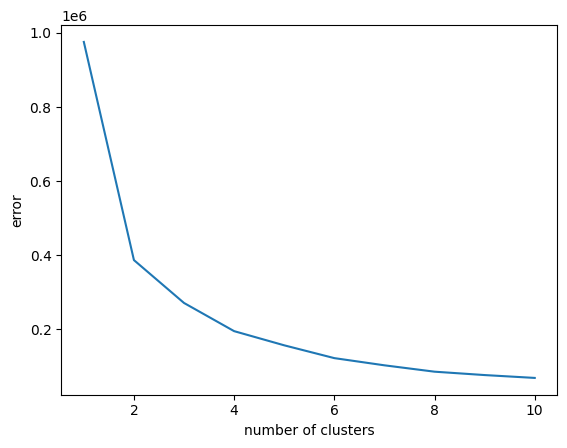

In [13]:
plt.plot(range(1,11),error)
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

In [17]:
km_model = cluster.KMeans(n_clusters=5,init = 'k-means++',random_state=0)

In [18]:

km_model.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [19]:
pred = km_model.predict(data)
pred

array([0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [20]:
data["Clusters"]=pred

In [21]:
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Clusters
0,1,19,15,39,0,1,0
1,2,21,15,81,0,1,0
2,3,20,16,6,1,0,4
3,4,23,16,77,1,0,0
4,5,31,17,40,1,0,4
...,...,...,...,...,...,...,...
195,196,35,120,79,1,0,3
196,197,45,126,28,1,0,1
197,198,32,126,74,0,1,3
198,199,32,137,18,0,1,1


In [25]:
inertia_score = kmeans.inertia_
print("inertia_score of 5 clusters:",inertia_score)

inertia_score of 5 clusters: 69279.96194639333


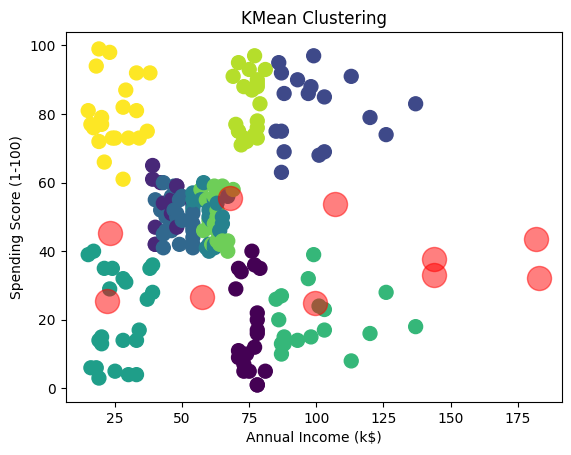

In [30]:
labels_km5 = kmeans.labels_

# Get the cluster centroids
centroids_km5= kmeans.cluster_centers_

plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, c=labels_km5, s=100)
plt.scatter(x=centroids_km5[:, 0], y=centroids_km5[:, 1], s=300, c='red', alpha=0.5)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.title('KMean Clustering')
plt.show()